## first forecast the model for simple liniar model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Airlines+Data.xlsx", sheet_name='Sheet1')

In [3]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
df.shape

(96, 2)

In [5]:
df.isna().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [9]:
df['Month'] = pd.to_datetime(df.Month)

In [10]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

<AxesSubplot:>

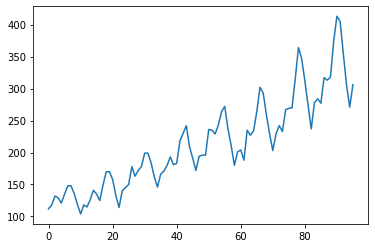

In [11]:
df.Passengers.plot()

<AxesSubplot:>

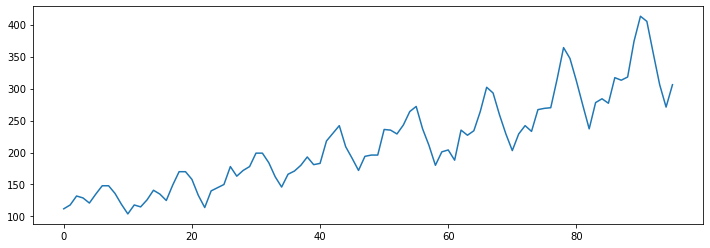

In [12]:
df = df.assign(Passengers_Mean_imputation = df['Passengers'].fillna(df['Passengers'].mean()))
df['Passengers_Mean_imputation'].plot(figsize=(12,4))

## Linear interpolation

In [13]:
df = df.assign(Passengers_Linear_Interpolation = df['Passengers'].interpolate(method='linear'))
df.head()

,Month,Passengers,Passengers_Mean_imputation,Passengers_Linear_Interpolation
0,1995-01-01,112,112,112
1,1995-02-01,118,118,118
2,1995-03-01,132,132,132
3,1995-04-01,129,129,129
4,1995-05-01,121,121,121


<AxesSubplot:>

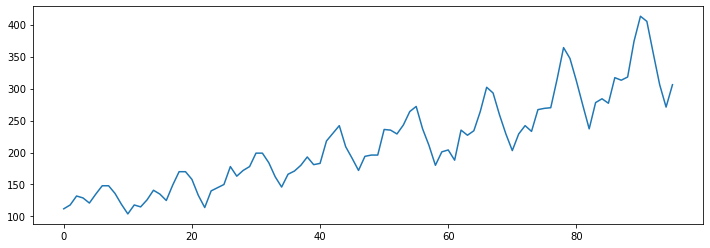

In [14]:
df['Passengers_Linear_Interpolation'].plot(figsize=(12,4))

## Outlier detection

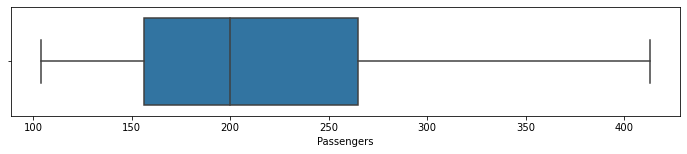

In [15]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df['Passengers'], whis=1.5)

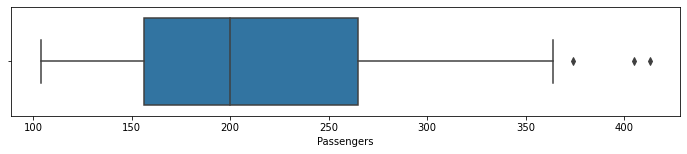

In [16]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df['Passengers'], whis=1)

array([[<AxesSubplot:title={'center':'Passengers'}>,
        <AxesSubplot:title={'center':'Passengers_Mean_imputation'}>],
       [<AxesSubplot:title={'center':'Passengers_Linear_Interpolation'}>,
        <AxesSubplot:>]], dtype=object)

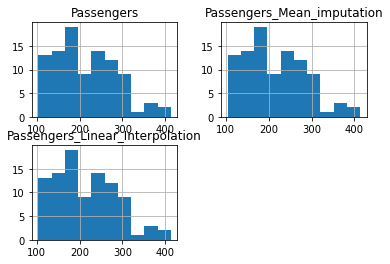

In [17]:
df.hist()

In [18]:
df.head()

,Month,Passengers,Passengers_Mean_imputation,Passengers_Linear_Interpolation
0,1995-01-01,112,112,112
1,1995-02-01,118,118,118
2,1995-03-01,132,132,132
3,1995-04-01,129,129,129
4,1995-05-01,121,121,121


### Dropping Passengers_Mean_imputation and Passengers columns.
### Renaming Passengers_Linear_Interpolation column to Passengers column.

In [19]:
df = df.drop(['Passengers', 'Passengers_Mean_imputation'], axis=1)

In [20]:
df.rename(columns={'Passengers_Linear_Interpolation' : 'Passengers'}, inplace=True)

In [21]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


## Build and Evaluate time series forecast
## Splitting the data into train and test set

In [22]:
train_len = 50
train = df[0:train_len]
# 1959 and 1960 data
test = df[train_len:]

In [23]:
df.shape

(96, 2)

In [24]:
test.shape

(46, 2)

In [25]:
train.shape

(50, 2)

## Naive method
## Forecast = Last month’s data

## Or the last data of the train set, which will be assigned to all the records of the test data.

In [26]:
# Creating a new dataframe by copying the test data
# Because we will forecast the last two years data and comapre the forecast in this new coppied dataframe.
y_hat_naive = test.copy()
y_hat_naive.head()

,Month,Passengers
50,1999-03-01,236
51,1999-04-01,235
52,1999-05-01,229
53,1999-06-01,243
54,1999-07-01,264


In [27]:
# Assigning the last value of the train set (December 1958 value) to all the test data records
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [28]:
y_hat_naive.head()

,Month,Passengers,naive_forecast
50,1999-03-01,236,196
51,1999-04-01,235,196
52,1999-05-01,229,196
53,1999-06-01,243,196
54,1999-07-01,264,196


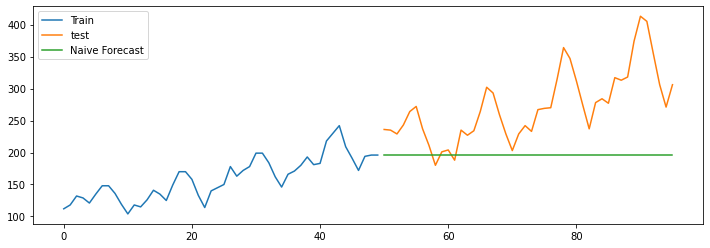

In [29]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

## Analysis
#### All the values are same as we assigned all the forecasting records to the last value of the train set(Dec 1958).
#### The forecasting is undervalued when compared to the actual test data value.

## Simple average method
#### Forecast = Average of all past months’ data

#### Average of all the train data values assigned to the test data

In [30]:
y_hat_avg = test.copy()

In [31]:
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

In [32]:
y_hat_avg.head()

,Month,Passengers,avg_forecast
50,1999-03-01,236,159.88
51,1999-04-01,235,159.88
52,1999-05-01,229,159.88
53,1999-06-01,243,159.88
54,1999-07-01,264,159.88


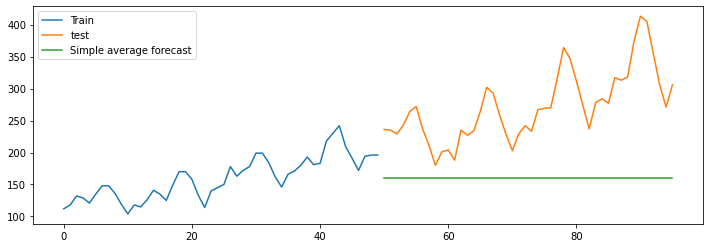

In [33]:
## ploting train test forcast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

## Calculate RMSE and MAPE Error

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
# mean_squared_error is a sqaured term of the error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
rmse

93.49

In [36]:
## MAPE (Mean absolute percentage error)
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_naive['naive_forecast'])/test['Passengers'])*100),2)
mape

25.83

In [37]:
results = pd.DataFrame({'Method':['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
results

,Method,RMSE,MAPE
0,Naive method,93.49,25.83


In [38]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_avg['avg_forecast'])/test['Passengers'])*100),2)
mape

39.03

## MAPE

In [39]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_avg['avg_forecast'])/test['Passengers'])*100),2)
mape 

39.03

In [40]:
results = pd.DataFrame({'Method':['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
results

,Method,RMSE,MAPE
0,Naive method,93.49,39.03


## Simple moving average method

In [41]:
# We are copying entire data because we want to see the forecast for the entire dataset (train and test)
y_hat_sma = df.copy()

In [42]:
# Moving average window. We will take the avg of last 12 months for forecasting the future. 
ma_window = 12

In [43]:
# Rolling function calculated the last number of records
y_hat_sma['sma_forecast'] = df['Passengers'].rolling(ma_window).mean()

In [44]:
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

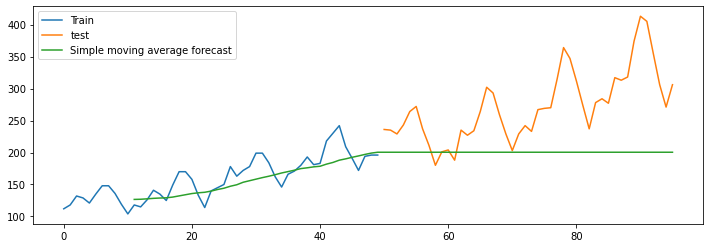

In [45]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

## The seasonal effect can not be captured.
## There is a trend in the forecasting line which grows linearly.

In [46]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
rmse

89.93

In [47]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100),2)
mape

24.35

In [48]:
results = results.append({'Method':'Simple moving average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,93.49,39.03
1,Simple moving average method,89.93,24.35


## Simple Exponential Smoothing

In [49]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [50]:
# Instantiate the model
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level = 0.2, optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [51]:
y_hat_ses = test.copy()
# Forecast for 24 months
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

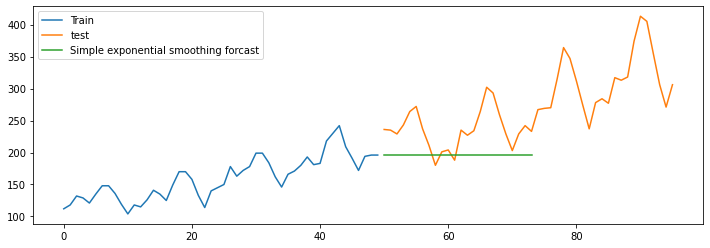

In [52]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()


In [53]:
y_hat_ses['ses_forecast'] = y_hat_ses['ses_forecast'].fillna(0)

In [54]:
rmse2 = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
rmse2

#rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
#rmse

221.21

In [55]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_ses['ses_forecast'])/test['Passengers'])*100),2)
mape

56.48

In [56]:
results = results.append({'Method':'Simple expenential smoothing method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,93.49,39.03
1,Simple moving average method,89.93,24.35
2,Simple expenential smoothing method,89.93,56.48


## Time Series Forecasting - II
## Auto Regressive Model (AR)
## Stationary vs Non-stationary Time Series

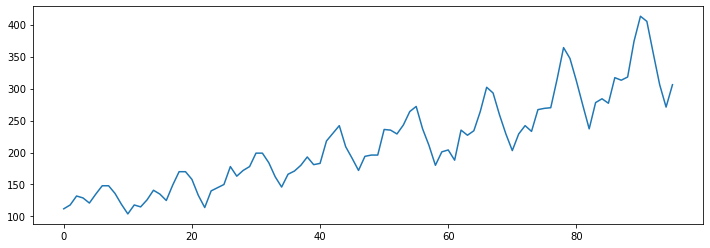

In [57]:
df['Passengers'].plot(figsize=(12,4))
plt.show()

##  Augmented Dickey-Fuller (ADF) Test

In [58]:
from statsmodels.tsa.stattools import adfuller

In [59]:
#Null Hypothesis (H0): The series is not stationary
#p-val > 0.05
#Alternate Hypothesis (H1): The series is stationary
#p-val <= 0.05


adf_test = adfuller(df['Passengers'])
adf_test

(1.3402479596467065,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [60]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: 1.340248
p-value: 0.996825
Critical value @ 0.05: -2.90


## Converting Non-Stationary to Stationary Time Series
#### Box Cox Transformation

In [61]:
from scipy.stats import boxcox

In [62]:
# Creating a new dfset with the boxcox
df_boxcox = pd.Series(boxcox(df['Passengers'], lmbda=0), df.index)
df_boxcox.head()

0    4.718499
1    4.770685
2    4.882802
3    4.859812
4    4.795791
dtype: float64

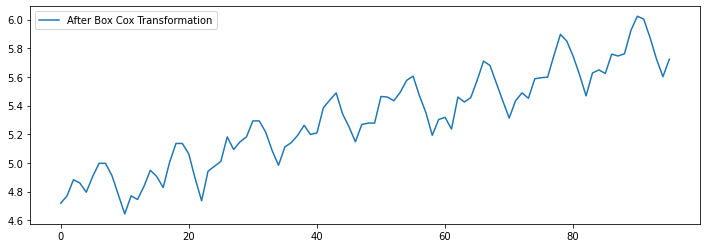

In [63]:
# Plotting the Time series after transformation
plt.figure(figsize=(12,4))
plt.plot(df_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.show()

## Differencing

In [64]:
# df_boxcox - df_boxcox.shift() :- Performs difference between the previous and current observations.
df_boxcox_diff = pd.Series(df_boxcox - df_boxcox.shift(), index=df.index)

In [65]:
df_boxcox_diff.dropna(inplace=True)

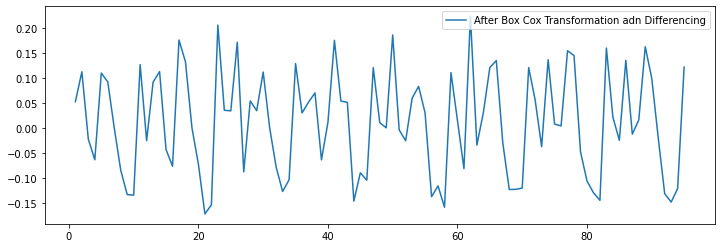

In [66]:
# Plotting the Time series after Box Cox transformation and Differencing
plt.figure(figsize=(12,4))
plt.plot(df_boxcox_diff, label='After Box Cox Transformation adn Differencing')
plt.legend(loc='best')
plt.show()

## Analysis
## We can see that there is no trend (upward or downward) after differencing on the Box Cox transformation.
#### It is a horizontal trend.
#### The mean became constant. The mean is zero.
#### Also, the variance is almost constant.

In [67]:
adf_test = adfuller(df_boxcox_diff)
adf_test

(-2.670822890269428,
 0.07922469056629994,
 12,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 -259.34387684331466)

In [68]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: -2.670823
p-value: 0.079225
Critical value @ 0.05: -2.90


## Autocorrelation
## Autocorrelation function (ACF)¶

In [69]:
from statsmodels.graphics.tsaplots import plot_acf

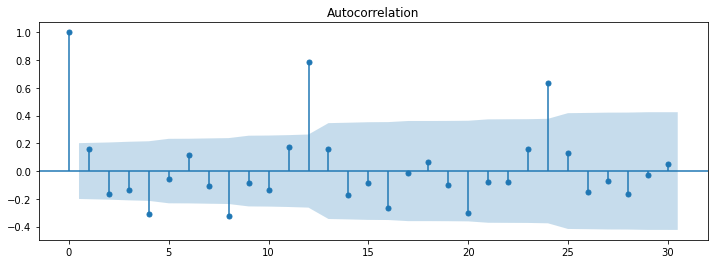

In [70]:
plt.figure(figsize=(12,4))
plot_acf(df_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

#### The shaded portion is the less significant.
#### With lag 0, the series is just correlated with itself. Hence, correlation=1 at lag=0.
#### ACF captures both direct and indirect correlation with the lag time.

## Converting Non-Stationary to Stationary Time Series
#### Box Cox Transformation

In [71]:
from scipy.stats import boxcox

In [72]:
# Creating a new dataset with the boxcox
df_boxcox = pd.Series(boxcox(df['Passengers'], lmbda=0), df.index)
df_boxcox.head()

0    4.718499
1    4.770685
2    4.882802
3    4.859812
4    4.795791
dtype: float64

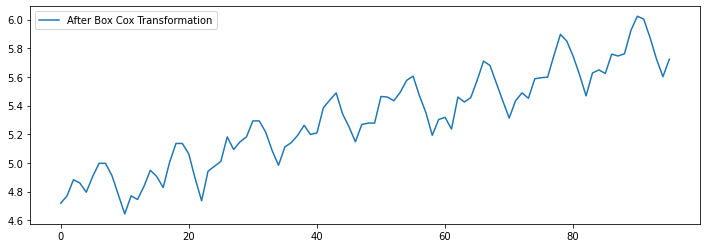

In [73]:
# Plotting the Time series after transformation
plt.figure(figsize=(12,4))
plt.plot(df_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.show()

## Differencing

In [74]:
# df_boxcox - df_boxcox.shift() :- Performs difference between the previous and current observations.
df_boxcox_diff = pd.Series(df_boxcox - df_boxcox.shift(), index=df.index)

In [75]:
# As the first record becomes null. Hence removing the frist observation.
df_boxcox_diff.dropna(inplace=True)

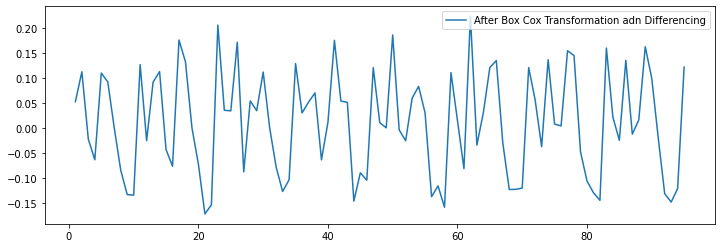

In [76]:
# Plotting the Time series after Box Cox transformation and Differencing
plt.figure(figsize=(12,4))
plt.plot(df_boxcox_diff, label='After Box Cox Transformation adn Differencing')
plt.legend(loc='best')
plt.show()

## We can see that there is no trend (upward or downward) after differencing on the Box Cox transformation.
#### It is a horizontal trend.
#### The mean became constant. The mean is zero.
#### Also, the variance is almost constant

In [77]:
#ADF Test
adf_test = adfuller(df_boxcox_diff)
adf_test

(-2.670822890269428,
 0.07922469056629994,
 12,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 -259.34387684331466)

In [78]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: -2.670823
p-value: 0.079225
Critical value @ 0.05: -2.90


## Autocorrelation

In [79]:
from statsmodels.graphics.tsaplots import plot_acf

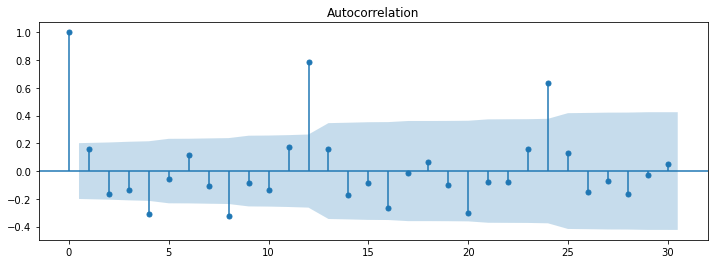

In [80]:
plt.figure(figsize=(12,4))
plot_acf(df_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

## Building the Regression Model

In [81]:
# Splitting data_boxcox
train_data_boxcox = df_boxcox[:train_len]
test_data_boxcox = df_boxcox[train_len:]

In [82]:
# Taking train_len-1 because we have deleted the forst observation
train_data_boxcox_diff = df_boxcox_diff[:train_len-1]
test_data_boxcox_diff = df_boxcox_diff[train_len-1:]

## Building the Regression Model
## Splitting Stationary dataset into train and test set

In [83]:
# Splitting data_boxcox
train_data_boxcox = df_boxcox[:train_len]
test_data_boxcox = df_boxcox[train_len:]

In [84]:
# Splitting data_boxcox_diff

# Taking train_len-1 because we have deleted the forst observation
train_data_boxcox_diff = df_boxcox_diff[:train_len-1]
test_data_boxcox_diff = df_boxcox_diff[train_len-1:]

## Simple Auto Regressive Model (AR)

In [85]:
from statsmodels.tsa.arima_model import ARIMA

In [86]:
# p = 1 . We are calculating only one lag time period 
# q = 0 . We have already made the time series as Stationary
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))

C:\Users\saurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [87]:
model_fit = model.fit()
model_fit.params

const      0.011513
ar.L1.y    0.134708
dtype: float64

#### constant = 0 . Because we saw in the Stationary time series that the mean was almost close to zero.

#### Coefficient = 0.183

## Forecast

In [88]:
y_hat_ar = df_boxcox_diff.copy()

In [89]:
# We are predicting for all the observations train and test set both just to visualise the regression line
# The index column represents the timestamp. So, we are taking all the timestamps from first(index.min) to last(index.max)
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())

C:\Users\saurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [90]:
# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()

In [91]:
# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(df_boxcox[0])

In [92]:
# Now doing the reverse transformation 
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

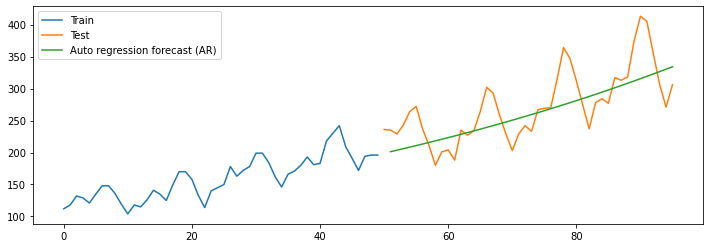

In [93]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

In [94]:
rmse = np.sqrt(mean_squared_error(test['Passengers'][:45], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
rmse

39.31

In [95]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_ar['ar_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape

11.27

In [96]:
results = results.append({'Method':'Auto regressive (AR) method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,93.49,39.03
1,Simple moving average method,89.93,24.35
2,Simple expenential smoothing method,89.93,56.48
3,Auto regressive (AR) method,39.31,11.27


## We can see that AR model has done reasonably good job but not better than Holt's method.

## Moving Average method (MA)

In [97]:
# q parameter = 1 MA(1) model
model = ARIMA(train_data_boxcox_diff, order=(0,0,1))

C:\Users\saurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [98]:
model_fit = model.fit()
model_fit.params

const      0.011477
ma.L1.y    0.194863
dtype: float64

In [99]:
y_hat_ma = df_boxcox_diff.copy()

In [100]:
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())

C:\Users\saurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [101]:
# Removing Differencing
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()

In [102]:
# Adding the first Ovservation
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(df_boxcox[0])

In [103]:
# Removing the transformation
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

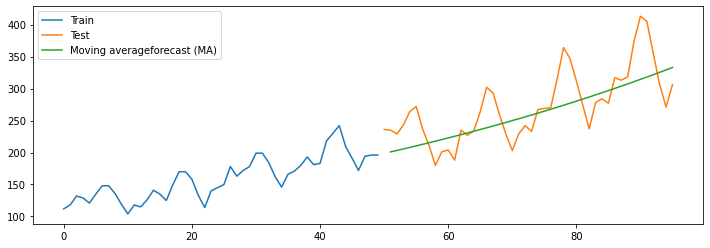

In [104]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving averageforecast (MA)')
plt.legend(loc='best')
plt.show()

In [105]:
y_hat_ma['ma_forecast'].isna().sum()

0

In [106]:
rmse = np.sqrt(mean_squared_error(test['Passengers'][:45], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
rmse

39.49

In [107]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape

11.28

In [108]:
results = results.append({'Method':'Moving average (MA) method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,93.49,39.03
1,Simple moving average method,89.93,24.35
2,Simple expenential smoothing method,89.93,56.48
3,Auto regressive (AR) method,39.31,11.27
4,Moving average (MA) method,39.49,11.28


## Auto Regressive Integrated Moving Average (ARMA)

#### Automatically performs the Differencing if the series has trend.

##### Hence, no need to manually perform the differencing.

In [109]:
# p=1 and q=1
model = ARIMA(train_data_boxcox_diff, order=(1,1,1))

C:\Users\saurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\saurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [110]:
model_fit = model.fit()
model_fit.params 

const       -0.000299
ar.L1.D.y    0.157038
ma.L1.D.y   -0.999935
dtype: float64

In [111]:
y_hat_arma = df_boxcox_diff.copy()

In [112]:
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())

C:\Users\saurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [113]:
# Reverse the differencing
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()

In [114]:
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(df_boxcox[0])

In [115]:
# Reverse the transformation
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

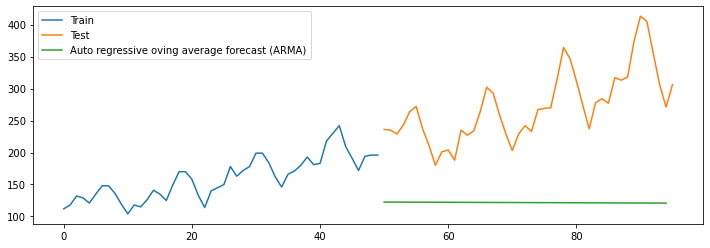

In [116]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='Auto regressive oving average forecast (ARMA)')
plt.legend(loc='best')
plt.show()

In [117]:
rmse = np.sqrt(mean_squared_error(test['Passengers'][:45], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
rmse

159.46

In [118]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_arma['arma_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape

53.41

In [119]:
results = results.append({'Method':'Auto regressive moving average (ARMA) method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,93.49,39.03
1,Simple moving average method,89.93,24.35
2,Simple expenential smoothing method,89.93,56.48
3,Auto regressive (AR) method,39.31,11.27
4,Moving average (MA) method,39.49,11.28
5,Auto regressive moving average (ARMA) method,159.46,53.41


## Auto Regressive Integrated Moving Average (ARIMA)
#### Automatically performs the Differencing if the series has trend.

#### Hence, no need to manually perform the differencing.

In [120]:
# Passing only the transformed boxcox data. Because ARIMA automatically performing the differencing.
# p = 1
# q = 1
# d = 1   , We are doing only one order differencing.
model = ARIMA(train_data_boxcox, order=(0,1,1))

In [121]:
model_fit = model.fit()
model_fit.params 

const        0.011477
ma.L1.D.y    0.194863
dtype: float64

In [122]:
y_hat_arima = df_boxcox_diff.copy()

In [123]:
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())

In [124]:
# Reverse the differencing
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()

In [125]:
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(df_boxcox[0])

In [126]:
# Reverse the transformation
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

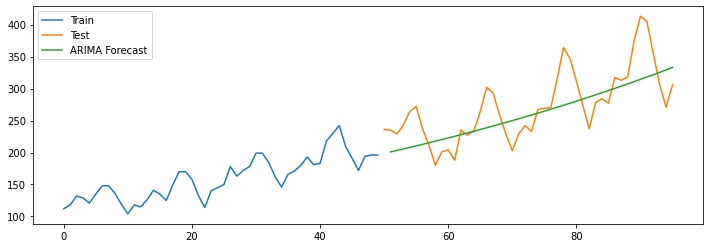

In [127]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA Forecast')
plt.legend(loc='best')
plt.show()

In [128]:
rmse = np.sqrt(mean_squared_error(test['Passengers'][:45], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
rmse

39.49

In [129]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_arima['arima_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape

11.28

In [130]:
results = results.append({'Method':'ARIMA method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,93.49,39.03
1,Simple moving average method,89.93,24.35
2,Simple expenential smoothing method,89.93,56.48
3,Auto regressive (AR) method,39.31,11.27
4,Moving average (MA) method,39.49,11.28
5,Auto regressive moving average (ARMA) method,159.46,53.41
6,ARIMA method,39.49,11.28


## Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [131]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [132]:
# We are only passing the Box Cox because the ARIMAX will perform the differencing internally
# seasonal_order P=1, Q=1, D=1 and m=12
# m=12 . Because the seasonality is monthly.
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))

In [133]:
model_fit = model.fit()
model_fit.params

C:\Users\saurav\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ar.L1       0.063435
ma.L1      -0.618711
ar.S.L12   -0.208732
ma.S.L12   -0.642304
sigma2      0.001479
dtype: float64

In [134]:
# We are copying data_boxcox_diff because we have to compare the test data with the Stationary version of the series (Transformation + Differencing)
y_hat_sarima = df_boxcox_diff.copy()

In [135]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())

In [136]:
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

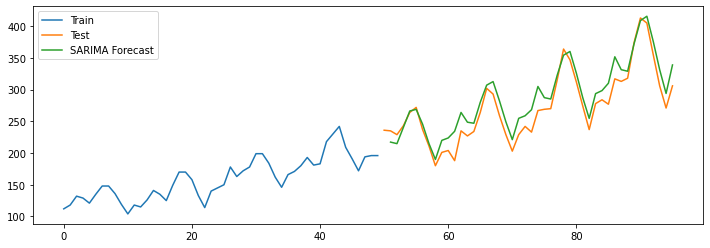

In [137]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

## Seasonal Auto Regressive Integrated Moving Average with External Variables (SARIMAX)


In [138]:
# Promotional dataset
promo = pd.read_excel("Airlines+Data.xlsx", sheet_name='Sheet1')
promo.columns = ['Month', 'Event']
promo['Month'] = pd.to_datetime(promo['Month'], format='%Y-%m')
promo = promo.set_index('Month')
promo.head()

,Event
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [139]:
## Splitting promotional dataset into train and test set
promo_train = promo[:46]
promo_test = promo[train_len:] 

In [140]:
model_fit = model.fit()
model_fit.params

C:\Users\saurav\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ar.L1       0.063435
ma.L1      -0.618711
ar.S.L12   -0.208732
ma.S.L12   -0.642304
sigma2      0.001479
dtype: float64

In [141]:
y_hat_sarimax = df_boxcox_diff.copy()

In [142]:
# Predicting only for test data. Not the entire series.
# Passing the exogenous test data
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(test.index.min(), test.index.max(), exog=promo_test)

In [143]:
# Reversing the transformation
# Note:- Reversing the differencing is automatically taken care by SARIMAX
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

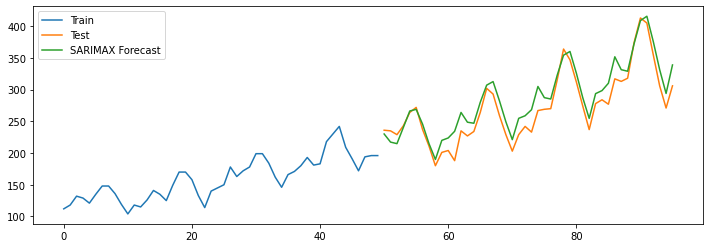

In [144]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'], label='SARIMAX Forecast')
plt.legend(loc='best')
plt.show()

In [145]:
test['Passengers'] = test['Passengers'].reindex()

In [146]:
y_hat_sarimax['sarimax_forecast'] = y_hat_sarimax['sarimax_forecast'].reindex()

In [147]:
y_hat_sarimax['sarimax_forecast'].shape

(46,)

In [148]:
test['Passengers'].shape

(46,)

In [149]:
len(y_hat_sarimax['sarimax_forecast'][test.index.min():])

0

In [150]:
y_hat_sarimax['sarimax_forecast'].shape

(46,)

In [151]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sarimax['sarimax_forecast'])).round(2)
rmse

19.97

In [152]:
train.shape

(50, 2)

In [153]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_sarimax['sarimax_forecast'])/test['Passengers'])*100),2)
mape

6.71

In [154]:
results = results.append({'Method':'SARIMAX method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,93.49,39.03
1,Simple moving average method,89.93,24.35
2,Simple expenential smoothing method,89.93,56.48
3,Auto regressive (AR) method,39.31,11.27
4,Moving average (MA) method,39.49,11.28
5,Auto regressive moving average (ARMA) method,159.46,53.41
6,ARIMA method,39.49,11.28
7,SARIMAX method,19.97,6.71
